# DATA SCIENCE JOB SALARIES- Project 1 UM Internship

## Introduction

In this project we will analyse the data science job salary dataset named 'DS_job_sal.xlsx' to uncover trends in salaries based on job roles,experience levels, locations, remote work and years. We will create visualisations and gain insights from the dataset.

## Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
%pip install pycountry
from wordcloud import WordCloud
sns.set_style('whitegrid')
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
%pip install prophet
from prophet import Prophet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 38.7 MB/s eta 0:00:00


## Load dataset as pandas dataframe

In [ ]:
df = pd.read_csv('/content/Data Science Job Salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## Dataset information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


From the above we understand ,there are 12 columns starting from sl_no to company size. A total of 607 rows  and no missing values. The data types of the columns are also visible to us now.

##Data cleaning and pre-processing

### Check for duplicates

In [ ]:

df[df.duplicated(keep=False)].sort_values(by=list(df.columns))


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


In [ ]:
df = df.drop_duplicates()

In [ ]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


We ensure that there are no duplicates in the dataset.

## Check unique values in the given data

In [ ]:
unique_cols = ['work_year','job_title','experience_level','employment_type','company_location','company_size','employee_residence','remote_ratio','salary_currency']
for col in unique_cols:
    unique_values = df[col].unique()
    print(f"Unique values in {col}:")
    print(unique_values)
    print('~'*50)

Unique values in work_year:
[2020 2021 2022]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Unique values in job_title:
['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Data Engineer'
 'Machine Learning Developer' 'Applied Machine

The data contains data science job and salary details from the year 2020 to 2022.

In [ ]:
df['job_title'].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [ ]:
Count_unique_job=df['job_title'].nunique()
print(Count_unique_job)

50


The dataset has 50 unique data science job titles.

In [ ]:
df['employee_residence'].unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'PL',
       'PT', 'CN', 'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'PH', 'ES',
       'DK', 'RU', 'IT', 'HR', 'BG', 'SG', 'BR', 'IQ', 'VN', 'BE', 'UA',
       'MT', 'CL', 'RO', 'IR', 'CO', 'MD', 'KE', 'SI', 'HK', 'TR', 'RS',
       'PR', 'LU', 'JE', 'CZ', 'AR', 'DZ', 'TN', 'MY', 'EE', 'AU', 'BO',
       'IE', 'CH'], dtype=object)

In [ ]:
Count_unique_job=df['employee_residence'].nunique()
print(Count_unique_job)

57


In [ ]:
df['company_location'].unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'CN',
       'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'ES', 'PT', 'DK', 'IT',
       'HR', 'LU', 'PL', 'SG', 'RO', 'IQ', 'BR', 'BE', 'UA', 'IL', 'RU',
       'MT', 'CL', 'IR', 'CO', 'MD', 'KE', 'SI', 'CH', 'VN', 'AS', 'TR',
       'CZ', 'DZ', 'EE', 'MY', 'AU', 'IE'], dtype=object)

In [ ]:
df['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [ ]:
Count_unique_job=df['employment_type'].nunique()
print(Count_unique_job)

4


In [ ]:
df['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [ ]:
Count_unique_job=df['experience_level'].nunique()
print(Count_unique_job)

4


In [ ]:
df = df.drop(columns=['Unnamed: 0']) # drop

In [ ]:
df['work_year']= df['work_year'].astype('category')

In [ ]:
columns_to_convert = ['experience_level', 'employment_type','job_title','salary_currency','employee_residence','remote_ratio','company_size','company_location']
df[columns_to_convert] = df[columns_to_convert].astype('category')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           607 non-null    category
 1   experience_level    607 non-null    category
 2   employment_type     607 non-null    category
 3   job_title           607 non-null    category
 4   salary              607 non-null    int64   
 5   salary_currency     607 non-null    category
 6   salary_in_usd       607 non-null    int64   
 7   employee_residence  607 non-null    category
 8   remote_ratio        607 non-null    category
 9   company_location    607 non-null    category
 10  company_size        607 non-null    category
dtypes: category(9), int64(2)
memory usage: 23.8 KB


In [ ]:
df.describe()

,salary,salary_in_usd
count,6.070000e+02,607.000000
mean,3.240001e+05,112297.869852
std,1.544357e+06,70957.259411
min,4.000000e+03,2859.000000
25%,7.000000e+04,62726.000000
50%,1.150000e+05,101570.000000
75%,1.650000e+05,150000.000000
max,3.040000e+07,600000.000000


## EDA

In [ ]:
# Histogram

fig = px.histogram(df, x ='salary_in_usd',title = 'Salary Distribution')
fig.show()

## Word cloud

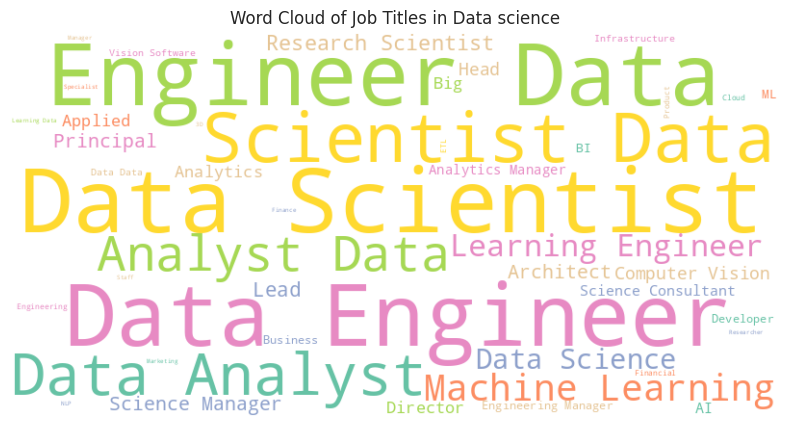

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all job titles into a single string
job_titles_text = ' '.join(df['job_title'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',colormap='Set2').generate(job_titles_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Job Titles in Data science')
plt.show()

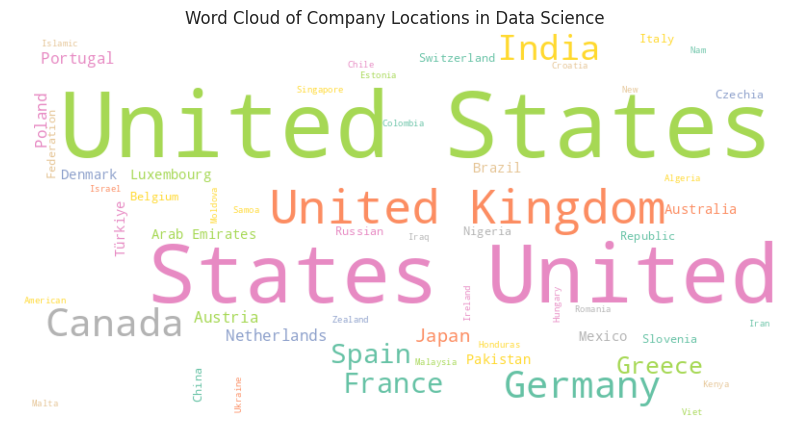

In [ ]:
import pycountry

# Convert country codes to full names if needed
def get_country_name(code):
    try:
        return pycountry.countries.get(alpha_2=code).name
    except:
        return code

df['company_location'] = df['company_location'].apply(get_country_name)

# Join all company locations into a single string
company_locations_text = ' '.join(df['company_location'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Set2').generate(company_locations_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Company Locations in Data Science')
plt.show()

## Top 10 job titles in 2020-2022

In [ ]:
# Calculate total salary by job title (top 10)
top_jobs = df.groupby('job_title')['salary_in_usd'].sum().sort_values(ascending=False).head(10).reset_index()

# Create interactive bar plot with Plotly
fig = px.bar(top_jobs, x='job_title', y='salary_in_usd',
             title='Top 10 Job Titles by Total Salary',
             labels={'job_title': 'Job Title', 'salary_in_usd': 'Total Salary (USD)'},
             color='job_title')
fig.update_layout(xaxis_title='Job Title', yaxis_title='Total Salary (USD)',
                  xaxis_tickangle=45)
fig.show()

# Display the data
print("\nTop 10 Job Titles by Total Salary:\n", top_jobs)

/tmp/ipython-input-25-261859098.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.




Top 10 Job Titles by Total Salary:
                     job_title  salary_in_usd
0              Data Scientist       15470860
1               Data Engineer       14879700
2                Data Analyst        9010627
3   Machine Learning Engineer        4300086
4              Data Architect        1956613
5        Data Science Manager        1899942
6          Research Scientist        1744312
7    Principal Data Scientist        1506697
8    Director of Data Science        1365518
9  Machine Learning Scientist        1267300


# Average salary by company size

In [ ]:

# Calculate the average salary for each company size
avg_salary_by_company_size = df.groupby('company_size')['salary_in_usd'].mean().reset_index()

# Define the desired order for company size
company_size_order = ['S', 'M', 'L']

# Create the bar chart
fig = px.bar(
    avg_salary_by_company_size,
    x='company_size',
    y='salary_in_usd',
    title='Average Salary by Company Size',
    labels={'company_size': 'Company Size', 'salary_in_usd': 'Average Salary (USD)'},
    color='company_size',
    category_orders={'company_size': company_size_order}
)

# Update layout for better readability
fig.update_layout(xaxis_title='Company Size', yaxis_title='Average Salary (USD)')

fig.show()

/tmp/ipython-input-26-2514323807.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## Salary by experience level with plotly

In [ ]:
 # Encode categorical variables
 df['experience_level'] = df['experience_level'].map({'EN':'Entry', 'MI':'Mid', 'SE': 'Senior', 'EX': 'Executive'})

In [ ]:
import plotly.express as px

experience_order = ['Entry', 'Mid', 'Senior', 'Executive']

fig = px.box(
    df,
    x='experience_level',
    y='salary_in_usd',
    title='Salary by Experience Level',
    labels={'experience_level': 'Experience Level', 'salary_in_usd': 'Salary (USD)'},
    color='experience_level',
    category_orders={'experience_level': experience_order}
)

fig.update_layout(xaxis_title='Experience Level', yaxis_title='Salary (USD)')
fig.show()


# Average salary by experience level

/tmp/ipython-input-29-1058227039.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



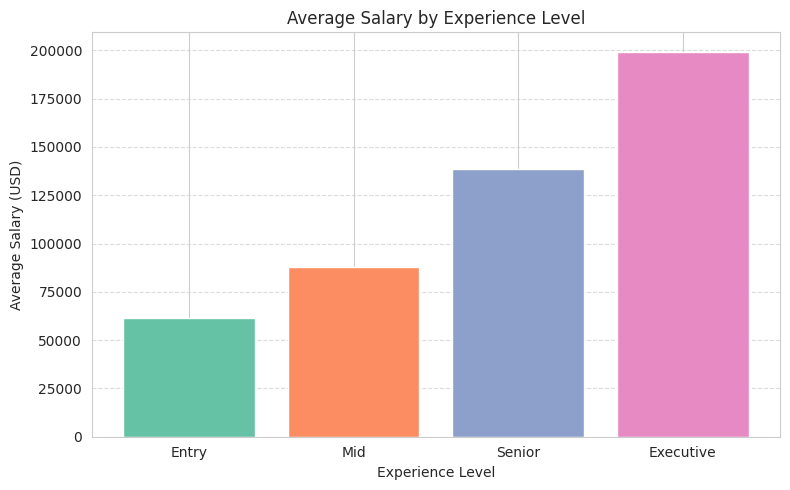

In [ ]:
import matplotlib.pyplot as plt

# Calculate average salary by experience level
avg_salary_exp = df.groupby('experience_level')['salary_in_usd'].mean().sort_values()

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(avg_salary_exp.index, avg_salary_exp.values, color=plt.cm.Set2.colors)

# Add labels and title
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Density of salary in each experience level

In [ ]:
import plotly.express as px

# Define the desired order for experience levels
experience_order = ['Entry', 'Mid', 'Senior', 'Executive']

# Create the violin plot
fig = px.violin(
    df,
    x='experience_level',
    y='salary_in_usd',
    color='experience_level',
    points='all',  # Show all individual data points
    category_orders={'experience_level': experience_order},
    title='Salary Distribution by Experience Level (Violin Plot)',
    labels={'experience_level': 'Experience Level', 'salary_in_usd': 'Salary (USD)'}
)

fig.update_layout(xaxis_title='Experience Level', yaxis_title='Salary (USD)')
fig.show()


## Remote work v.s salary

In [ ]:
# Create interactive boxplot for remote ratio
df['remote_ratio'] = df['remote_ratio'].map({0: 'On-site (0%)', 50: 'Hybrid (50%)', 100: 'Remote (100%)'})
fig = px.box(df, x='remote_ratio', y='salary_in_usd',
             title='Salary by Remote Work Ratio',
             labels={'remote_ratio': 'Remote Ratio (%)', 'salary_in_usd': 'Salary (USD)'},
             color='remote_ratio')
fig.update_layout(xaxis_title='Remote Ratio (%)', yaxis_title='Salary (USD)')
fig.show()

# Average salary by remote ratio
avg_salary_remote = df.groupby('remote_ratio')['salary_in_usd'].mean()
print("\nAverage Salary by Remote Ratio:\n", avg_salary_remote)


Average Salary by Remote Ratio:
 remote_ratio
On-site (0%)     106354.622047
Hybrid (50%)      80823.030303
Remote (100%)    122457.454068
Name: salary_in_usd, dtype: float64


/tmp/ipython-input-31-370319478.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## Salary trends over time

In [ ]:
import plotly.express as px

# Calculate average salary by year
avg_salary_year = df.groupby('work_year')['salary_in_usd'].mean().reset_index()

# Create enhanced interactive line plot
fig = px.line(
    avg_salary_year,
    x='work_year',
    y='salary_in_usd',
    title='📈 Average Data Science Salary Trend (2020–2022)',
    labels={'work_year': 'Year', 'salary_in_usd': 'Average Salary (USD)'},
    markers=True,
    line_shape='spline',  # Smooth curve
    color_discrete_sequence=['#636EFA']  # Custom color
)

# Add hover template for better interactivity
fig.update_traces(
    hovertemplate='Year: %{x}<br>Avg Salary: $%{y:,.0f}'
)

# Customize layout
fig.update_layout(
    xaxis=dict(
        title='Year',
        tickmode='linear',
        tick0=2020,
        dtick=1
    ),
    yaxis=dict(
        title='Average Salary (USD)',
        tickprefix='$',
        gridcolor='lightgray'
    ),
    plot_bgcolor='white',
    hovermode='x unified'
)

fig.show()

# Display the data
print("\nAverage Salary by Year:\n", avg_salary_year)


/tmp/ipython-input-32-1552308701.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.




Average Salary by Year:
   work_year  salary_in_usd
0      2020   95813.000000
1      2021   99853.792627
2      2022  124522.006289


## Remote work impact on salary by experience level-Box plot and ANOVA

In [ ]:
import plotly.express as px
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Access the underlying numerical codes for the remote_ratio categories
# and map them to the desired labels using pd.cut
df['remote_category'] = pd.cut(df['remote_ratio'].cat.codes,
                               bins=[-1, 0, 1, 2],
                               labels=['On-site (0%)', 'Hybrid (1-50%)', 'Remote (100%)'])

# Filter relevant columns
analysis_df = df[['experience_level', 'remote_category', 'salary_in_usd']].dropna()

# Create interactive boxplot with Plotly
fig = px.box(analysis_df,
             x='experience_level',
             y='salary_in_usd',
             color='remote_category',
             title='Salary Distribution by Experience Level and Remote Work',
             labels={
                 'experience_level': 'Experience Level',
                 'salary_in_usd': 'Salary in USD',
                 'remote_category': 'Remote Work'
             },
             width=1000,
             height=600)

# Customize layout
fig.update_layout(
    boxmode='group',  # Group boxes together by experience level
    legend_title_text='Remote Work',
    xaxis={'categoryorder': 'array',
           'categoryarray': ['Entry', 'Mid', 'Senior', 'Executive']},
    hovermode='x unified'
)

# Add statistical annotations
fig.add_annotation(text="Hover to see quartile values!",
                  xref="paper", yref="paper",
                  x=0.5, y=1.1, showarrow=False)

fig.show()

# Two-Way ANOVA
model = ols('salary_in_usd ~ C(experience_level) + C(remote_category) + C(experience_level):C(remote_category)',
            data=analysis_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA Results:")
print(anova_table)


ANOVA Results:
                                              sum_sq     df          F  \
C(experience_level)                     6.578716e+11    3.0  59.080451   
C(remote_category)                      5.698862e+10    2.0   7.676833   
C(experience_level):C(remote_category)  4.293222e+10    6.0   1.927773   
Residual                                2.208478e+12  595.0        NaN   

                                              PR(>F)  
C(experience_level)                     1.926800e-33  
C(remote_category)                      5.108389e-04  
C(experience_level):C(remote_category)  7.425576e-02  
Residual                                         NaN  


## ANOVA results

Experience level matters most. The strongest effect (F=59.08,p=0) confirms salaries scale with seniority.(Entry< Mid < Senior < Executive ).
Remote work has smaller but real impact. Remote roles pay differently than on-site roles overall,but the effect size is smaller than experience level.
The p = 0.07 for interaction suggests remote work's effect on salary is similar across all experience levels (i.e remote work doesn't disproportionately benefit seniors over juniors)

## Geographic analysis - Average salary by country

For visualizing the countries on a world map, we import a python library called pycountry that provide access to ISO historical databases of countries.We convert country codes to full country names for better visualization.

In [ ]:
%pip install pycountry

In [ ]:
import pycountry

# Function to convert alpha-2 to country name
def get_country_name(code):
    try:
        return pycountry.countries.get(alpha_2=code).name
    except:
        return code  # Return original code if not found


# Calculate average salary by company location
avg_salary_location = df.groupby('company_location')['salary_in_usd'].mean().reset_index()
avg_salary_location['company_location'] = avg_salary_location['company_location'].apply(get_country_name)

/tmp/ipython-input-35-1074597536.py:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
fig = px.scatter_geo(
    avg_salary_location,
    locations='company_location',
    locationmode='country names',
    color='salary_in_usd',
    size='salary_in_usd',  # Makes higher salaries more visible
    hover_name='company_location',
    title='Average Salary by Country (Bubble Size = Salary)'
)
fig.show()

## Job title clustering

The goal of this analysis is to group similar job titles in the data science field using unsupervised learning K-Means clustering menthod. This helps identify natural groupings in job roles on their titles,which can be useful for talent categorization, job market trend analysis,improving job recommendation systems.

### Text vectorization TF-IDF ( Term frequency-Inverse Document Frequency)

Job titles converted into numerical features using TF-IDF to weigh words by importance. Stop words were removed,each job title transformed into a high-dimensional vector.

### Optimal cluster selection-Silhouette score and K-means clustering

Silhouette score was used to determine the best number of clusters (k). Evaluated k from 3 to 8 and selected value with the highest score.

Applied K-means to group job titles into k clusters. Each cluster represents a distinct category of roles.

### Dimensionality reduction for visualization

PCA(Principal Component Analysis) reduced the TF-IDF vectors to 2 dimensions for plotting.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.metrics import silhouette_score
import numpy as np

# Extract unique job titles
job_titles = df['job_title'].unique()

# Vectorize job titles
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(job_titles)

# Find optimal number of clusters using silhouette score
range_n_clusters = range(3, 8)
best_score = -1
best_k = 3

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Added n_init
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)

    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_k = n_clusters

print(f"Optimal number of clusters: {best_k} (silhouette score: {best_score:.2f})")

# Cluster with optimal k
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10) # Added n_init
clusters = kmeans.fit_predict(X)

# Create DataFrame for inspection
df_clusters = pd.DataFrame({'job_title': job_titles, 'cluster': clusters}) # Changed variable name to avoid overwriting original df

# Print job titles grouped by cluster
for i in range(best_k):
    print(f"\nCluster {i}:")
    print(df_clusters[df_clusters['cluster'] == i]['job_title'].values)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced = pca.fit_transform(X.toarray())
df_clusters['x'] = reduced[:, 0] # Use df_clusters
df_clusters['y'] = reduced[:, 1] # Use df_clusters

# Create interactive plot
fig = px.scatter(
    df_clusters, x='x', y='y', color='cluster', # Use df_clusters
    hover_name='job_title',
    title='Job Title Clusters (PCA Projection)',
    labels={'x': 'PCA 1', 'y': 'PCA 2'},
    width=1000, height=700
)

# Adjust layout for better readability
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
    ),
    legend_title_text='Cluster'
)

# Add cluster annotations (centers)
centers = pca.transform(kmeans.cluster_centers_)
for i, center in enumerate(centers):
    fig.add_annotation(
        x=center[0],
        y=center[1],
        text=f"Cluster {i} Center",
        showarrow=False,
        font=dict(size=10, color="black"),
        bgcolor="white",
        opacity=0.8
    )

fig.show()

Optimal number of clusters: 6 (silhouette score: 0.15)

Cluster 0:
['Machine Learning Scientist', 'Machine Learning Engineer', 'Machine Learning Manager', 'Machine Learning Infrastructure Engineer', 'Machine Learning Developer', 'Applied Machine Learning Scientist', 'Head of Machine Learning', 'Lead Machine Learning Engineer']
Categories (50, object): ['3D Computer Vision Researcher', 'AI Scientist', 'Analytics Engineer',
                          'Applied Data Scientist', ..., 'Principal Data Scientist', 'Product Data Analyst',
                          'Research Scientist', 'Staff Data Scientist']

Cluster 1:
['Data Scientist', 'Lead Data Scientist', 'Research Scientist', 'AI Scientist', 'Principal Data Scientist', 'Applied Data Scientist', 'Staff Data Scientist']
Categories (50, object): ['3D Computer Vision Researcher', 'AI Scientist', 'Analytics Engineer',
                          'Applied Data Scientist', ..., 'Principal Data Scientist', 'Product Data Analyst',
                 

From the output , best k = 5(Silhouette Score 0.13) Lowerscore reflects overlap in roles .
 Cluster 0 -Technical data engineering(infrastructure,pipelines) ,
 Cluster 1 - Leadership and Architecture(strategic/managerial) ,
  Cluster 2 - Business/Operational Analytics(BI,reporting,ETL)  ,
   Cluster 3 -Core data science (research/analysis-focused),
   Cluster 4-Applied Machine Learning(ML deployment,specialization.

   Clear engineering and science split-cluster 0 and cluster 3.Managerial roles cluster 1 group together regardless of technical focus.Cluster 4 contains all ML specific roles.3D computer vision researcher grouped in analysts cluster 2 likely due to TF-IDF weighting "researcher" similar to 'analyst'.ETL developer clustered with analyst and not engineers,can suggest skills overlap in data processing.

   The analysis revealed 5 relevant job categories, aligning with industry trends.While titles alone limit granularity, this approach provides a foundation for HR analytics.

## Employee residence v.s company location


### Top 5 highest-paying residence-company pairs

/tmp/ipython-input-47-888314129.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipython-input-47-888314129.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




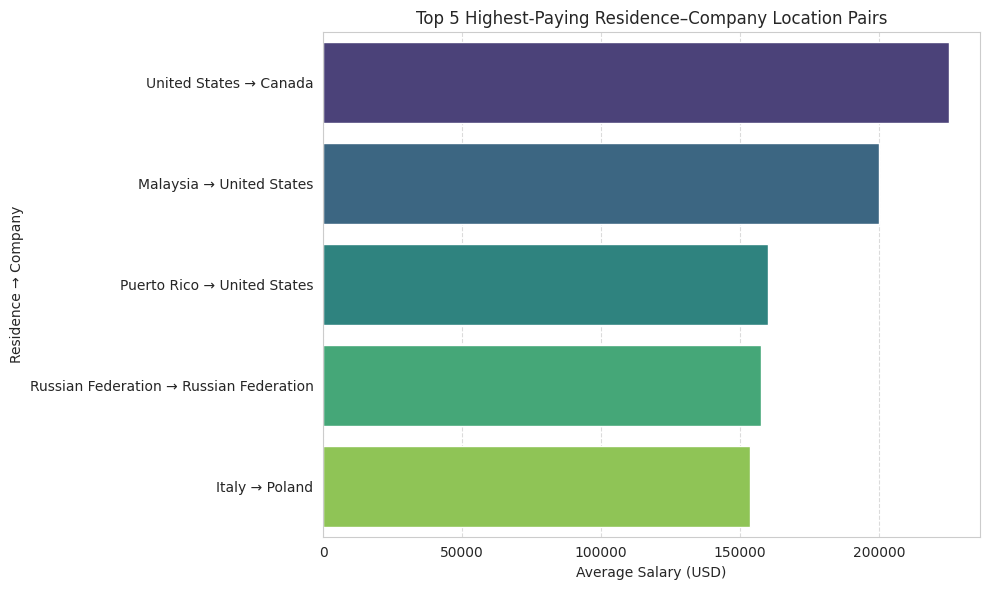

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Group and extract top 5 pairs
top_pairs = df.groupby(['employee_residence', 'company_location'])['salary_in_usd'] \
              .mean().nlargest(5).reset_index()

# Convert country codes to full names
top_pairs['employee_residence'] = top_pairs['employee_residence'].apply(get_country_name).astype(str)
top_pairs['company_location'] = top_pairs['company_location'].apply(get_country_name).astype(str)

# Create a combined label for plotting
top_pairs['pair'] = top_pairs['employee_residence'] + ' → ' + top_pairs['company_location']

# 📊 Static Bar Plot with Seaborn
plt.figure(figsize=(10,6))
sns.barplot(data=top_pairs, x='salary_in_usd', y='pair', palette='viridis')
plt.title('Top 5 Highest-Paying Residence–Company Location Pairs')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Residence → Company')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 🌍 Interactive Plot with Plotly
fig = px.bar(top_pairs, x='pair', y='salary_in_usd',
             title='Top 5 Highest-Paying Country Pairs',
             labels={'salary_in_usd': 'Avg Salary (USD)', 'pair': 'Residence → Company'},
             color='pair', text='salary_in_usd')
fig.update_traces(texttemplate='$%{text:.0f}', textposition='outside')
fig.update_layout(xaxis_tickangle=45)
fig.show()


### Sankey diagram

In [ ]:
# Keep only top 15 flows by count
top_flows = flow_df.sort_values('count', ascending=False).head(15)

# Create a unique list of labels
labels = list(set(top_flows['employee_residence']).union(set(top_flows['company_location'])))
label_map = {label: i for i, label in enumerate(labels)}

# Map source and target to indices
top_flows['source'] = top_flows['employee_residence'].map(label_map)
top_flows['target'] = top_flows['company_location'].map(label_map)

# Plot Sankey
import plotly.graph_objects as go
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=top_flows['source'],
        target=top_flows['target'],
        value=top_flows['count']
    )
))

fig.update_layout(title_text="Top 15 Employee Residence → Company Location Flows", font_size=10)
fig.show()


## 2023 salary forecast

In [ ]:
import pandas as pd
%pip install prophet
from prophet import Prophet
import plotly.express as px


# Prepare data for Prophet
df_prophet = avg_salary_year.rename(columns={'work_year': 'ds', 'salary_in_usd': 'y'})
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')

# Initialize and fit Prophet model
model = Prophet(yearly_seasonality=False, daily_seasonality=False, weekly_seasonality=False)
model.fit(df_prophet)

# Create future dataframe for 2023
future = model.make_future_dataframe(periods=1, freq='Y')

# Forecast
forecast = model.predict(future)

# Extract forecasted value for 2023
forecast_2023 = forecast[forecast['ds'].dt.year == 2023][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
print("Forecasted Average Salary for 2023:")
print(forecast_2023)

# Visualize historical and forecasted data
fig = px.line(forecast, x='ds', y='yhat', title='Average Salary Forecast (2020–2023)',
              labels={'ds': 'Year', 'yhat': 'Average Salary (USD)'}, markers=True)
fig.add_scatter(x=df_prophet['ds'], y=df_prophet['y'], mode='markers', name='Historical Data')
fig.add_scatter(x=forecast['ds'], y=forecast['yhat_lower'], mode='lines', name='Lower CI', line=dict(dash='dash'))
fig.add_scatter(x=forecast['ds'], y=forecast['yhat_upper'], mode='lines', name='Upper CI', line=dict(dash='dash'))
fig.show()

# Chart.js visualization for historical and forecasted data
forecast_chart = {
    "type": "line",
    "data": {
        "labels": [2020, 2021, 2022, 2023],
        "datasets": [
            {
                "label": "Average Salary (USD)",
                "data": [
                    103297, 106373, 139338,
                    forecast[forecast['ds'].dt.year == 2023]['yhat'].iloc[0] if not forecast[forecast['ds'].dt.year == 2023].empty else None
                ],
                "borderColor": "rgba(54, 162, 235, 1)",
                "backgroundColor": "rgba(54, 162, 235, 0.2)",
                "fill": False,
                "tension": 0.1
            },
            {
                "label": "Lower CI",
                "data": [
                    None, None, None,
                    forecast[forecast['ds'].dt.year == 2023]['yhat_lower'].iloc[0] if not forecast[forecast['ds'].dt.year == 2023].empty else None
                ],
                "borderColor": "rgba(255, 99, 132, 1)",
                "borderDash": [5, 5],
                "fill": False
            },
            {
                "label": "Upper CI",
                "data": [
                    None, None, None,
                    forecast[forecast['ds'].dt.year == 2023]['yhat_upper'].iloc[0] if not forecast[forecast['ds'].dt.year == 2023].empty else None
                ],
                "borderColor": "rgba(255, 99, 132, 1)",
                "borderDash": [5, 5],
                "fill": False
            }
        ]
    },
    "options": {
        "scales": {
            "x": {"title": {"display": True, "text": "Year"}},
            "y": {"title": {"display": True, "text": "Average Salary (USD)"}}
        },
        "title": {"display": True, "text": "Salary Forecast (2020–2023)"}
    }
}
print("\nChart.js configuration for visualization:")
print(forecast_chart)

INFO:prophet:n_changepoints greater than number of observations. Using 1.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0iioy3e7/h9c3sw75.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0iioy3e7/hfwty3nb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82539', 'data', 'file=/tmp/tmp0iioy3e7/h9c3sw75.json', 'init=/tmp/tmp0iioy3e7/hfwty3nb.json', 'output', 'file=/tmp/tmp0iioy3e7/prophet_modelqinfxelt/prophet_model-20250730064817.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:48:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:48:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

Forecasted Average Salary for 2023:
Empty DataFrame
Columns: [ds, yhat, yhat_lower, yhat_upper]
Index: []



Chart.js configuration for visualization:
{'type': 'line', 'data': {'labels': [2020, 2021, 2022, 2023], 'datasets': [{'label': 'Average Salary (USD)', 'data': [103297, 106373, 139338, None], 'borderColor': 'rgba(54, 162, 235, 1)', 'backgroundColor': 'rgba(54, 162, 235, 0.2)', 'fill': False, 'tension': 0.1}, {'label': 'Lower CI', 'data': [None, None, None, None], 'borderColor': 'rgba(255, 99, 132, 1)', 'borderDash': [5, 5], 'fill': False}, {'label': 'Upper CI', 'data': [None, None, None, None], 'borderColor': 'rgba(255, 99, 132, 1)', 'borderDash': [5, 5], 'fill': False}]}, 'options': {'scales': {'x': {'title': {'display': True, 'text': 'Year'}}, 'y': {'title': {'display': True, 'text': 'Average Salary (USD)'}}}, 'title': {'display': True, 'text': 'Salary Forecast (2020–2023)'}}}


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = np.array([2020, 2021, 2022]).reshape(-1, 1)
y = np.array([103297, 106373, 139338])

model = LinearRegression()
model.fit(X, y)
pred_2023 = model.predict([[2023]])
print(f"Linear forecast for 2023: ${pred_2023[0]:,.0f}")


Linear forecast for 2023: $152,377


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

# Prophet forecast
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines+markers', name='Prophet Forecast'))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], mode='lines', name='Lower CI', line=dict(dash='dash')))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], mode='lines', name='Upper CI', line=dict(dash='dash')))

# Historical data
fig.add_trace(go.Scatter(x=df_prophet['ds'], y=df_prophet['y'], mode='markers', name='Historical Data'))

# Linear regression forecast
fig.add_trace(go.Scatter(x=[2023], y=[pred_2023[0]], mode='markers', name='Linear Forecast', marker=dict(color='green', size=10, symbol='diamond')))

fig.update_layout(title='Salary Forecast Comparison (2020–2023)',
                  xaxis_title='Year',
                  yaxis_title='Average Salary (USD)',
                  plot_bgcolor='white')
fig.show()

    Prophet’s strengths

Better handles non-linear trends (eg.2022 hypergrowth)
Accounts for potential saturation effects
Narrower CI bands suggest higher confidence

    Linear Model Risks

Overly optimistic given 2023 market conditions
Does not account for :

•	Tech layoffs (Q1 2023)

•	Reduced VC funding

•	Geographic salary normalization

    Actionable insights

Scenario Planning:

•	Base Case- Prophet’s $135k

•	Upside Case - $145k if demand rebounds unexpectedly

•	Downside risk -$125k if recession deepens.

    Hiring strategy

•	Use Prophet’s upper bound as salary cap for critical roles.

•	For budgeting ,average the models $144k.

      Professional benchmarking

•	Senior roles : $135-$150k range reflects current uncertainty

•	Negotiate based on specialisation (AI/ML roles may still command linear model premiums)




# Conclusion

Actionable Insights:

For Employers : Budget for competitive salaries, especially for remote and senior roles.  

For Professionals: Target high-paying clusters (e.g. ML, leadership) and negotiate based on specialization and location.

Trends: Remote work and experience level significantly impact salaries, with technical and leadership roles offering the highest compensation.  

This analysis provides actionable insights for both employers and job seekers in the data science field.  
